In [27]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import missingno as msno
import pymc as pm
import scipy.stats as stats

In [28]:
train_df = pd.read_csv('C:\\Users\\willi10l\\Downloads\\ImputationRemoved.csv')


In [29]:
parameter = pm.Exponential("poisson_param", 1)
data_generator = pm.Poisson("data_generator", parameter)
data_plus_one = data_generator + 1

In [30]:
print("Children of 'parameter': ")
print(parameter.children)
print("/nParents of 'data_generator': ")
print(data_generator.parents)
print("/nChildren of 'data_generator': ")
print(data_generator.children)

Children of 'parameter': 
{<pymc.distributions.new_dist_class.<locals>.new_class 'data_generator' at 0x0000021AD7A0B6A0>}
/nParents of 'data_generator': 
{'mu': <pymc.distributions.new_dist_class.<locals>.new_class 'poisson_param' at 0x0000021AD7A1C470>}
/nChildren of 'data_generator': 
{<pymc.PyMCObjects.Deterministic '(data_generator_add_1)' at 0x0000021AD77D13C8>}


In [31]:
print("parameter.value =", parameter.value)
print("data_generator.value =", data_generator.value)
print("data_plus_one.value =", data_plus_one.value)

parameter.value = 2.3003418319730073
data_generator.value = 4
data_plus_one.value = 5


In [32]:
lambda_1 = pm.Exponential("lambda_1", 1) #prior first behavior
lambda_2 = pm.Exponential("lambda_2", 2) #prior on second behavior
tau = pm.DiscreteUniform("tau", lower=0, upper=10) #prior on behaviour change


In [35]:
print("lambda_1.value = %.3f" % lambda_1.value)
print("lambda_2.value = %.3f" % lambda_2.value)
print("tau.value = %.3f" % tau.value, "\n")

lambda_1.random(), lambda_2.random(), tau.random()

print("After calling random() on the variables...")
print("lambda_1.value = %.3f" % lambda_1.value)
print("lambda_2.value = %.3f" % lambda_2.value)
print("tau.value = %.3f" % tau.value)

lambda_1.value = 0.155
lambda_2.value = 0.017
tau.value = 8.000 

After calling random() on the variables...
lambda_1.value = 0.173
lambda_2.value = 1.471
tau.value = 7.000


In [36]:
type(lambda_1 + lambda_2)

pymc.PyMCObjects.Deterministic

In [37]:
import numpy as np

In [39]:
n_data_points = 5 #in CHI we had~70 data points

@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_data_points)
    out[:tau] = lambda_1 # lambda before tau is lambda1
    out[tau:] = lambda_2 # lambda after tau is lambda2
    return out

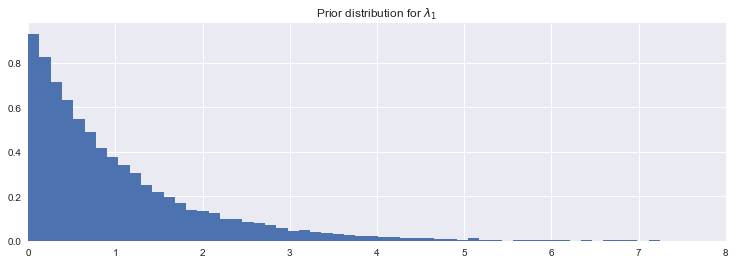

In [46]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(12.5, 4)

samples = [lambda_1.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")
plt.title("Prior distribution for $\lambda_1$")
plt.xlim(0, 8);

In [47]:
data = np.array([10, 5])
bp_data.to_csv("path/to/new_file.csv", sep=" ", header=False, index=False)

In [ ]:
Status: 
 
Help Requested:  
 
Next Steps: 
 
 